# Amazon Category Predictor (Project 18)

*Note: Random Forests have been commented out of this Jupyter notebook due to the large file size of the classifier object (clf_rf.pkl). **Rerunning this notebook will result in different results**; most notably, a poorer performance of the ensemble. To view the results with Random Forests included, please see the exported project.html file.*

## Load the Data and Classifiers

In [1]:
from main import *
from eli5._feature_names import FeatureNames
import eli5
LOAD_SAVED = True
OVERWRITE_SAVED = False
train_X, train_Y, test_X, test_Y, summary_cv, review_cv = memo.get_data(LOAD_SAVED, OVERWRITE_SAVED, CATEGORIES, 0.75, 100)
clf_nb = memo.get_classifier(LOAD_SAVED, OVERWRITE_SAVED, trainer.naive_bayes, train_X, train_Y, 'clf_nb')
clf_bnb = memo.get_classifier(LOAD_SAVED, OVERWRITE_SAVED, trainer.bernoulli_naive_bayes, train_X, train_Y, 'clf_bnb')
clf_lr = memo.get_classifier(LOAD_SAVED, OVERWRITE_SAVED, trainer.logistic_regression, train_X, train_Y, 'clf_lr')
# clf_rf = memo.get_classifier(LOAD_SAVED, OVERWRITE_SAVED, trainer.random_forest, train_X, train_Y, 'clf_rf')
clf_gb = memo.get_classifier(LOAD_SAVED, OVERWRITE_SAVED, trainer.gradient_boost, train_X, train_Y, 'clf_gb')
classes = list(sorted(set(train_Y)))

## Visualizing the Classifiers

### Weight Skews (Logistic Regression)

In [2]:
feature_names = FeatureNames(summary_cv.get_feature_names() + review_cv.get_feature_names() + ['helpfulness rating'] + ['overall rating'] + ['review time'])
eli5.show_weights(clf_lr, top=5, feature_names=feature_names, targets=classes)

### Example Prediction

In [3]:
eli5.show_prediction(clf_lr, test_X.getrow(400), feature_names=feature_names, targets=classes)

Some notes about our features:
- Features like review time, helpfulness rating, and overall rating seemed to have negative contributions to almost all category predictions.
- Our bias was always a strong feature, however almost always negative.
- Because we had two separate BOWs for our summary and review text, some words show up twice in the prediction models above.

## Predict

### Multinomial Naïve Bayes

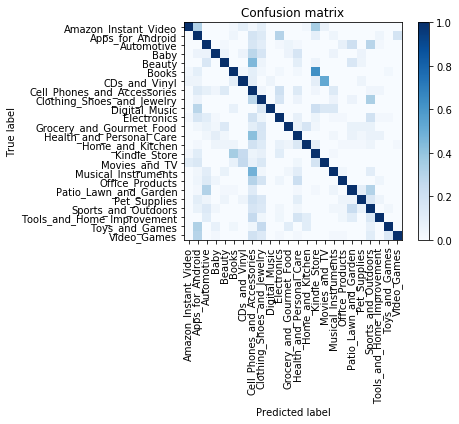

In [4]:
test_prd_nb = clf_nb.predict(test_X)
test_err_nb = tester.error_ratio(test_Y, test_prd_nb)
tester.disp_conf_matrix(test_Y, test_prd_nb, classes)

### Bernoulli Naïve Bayes

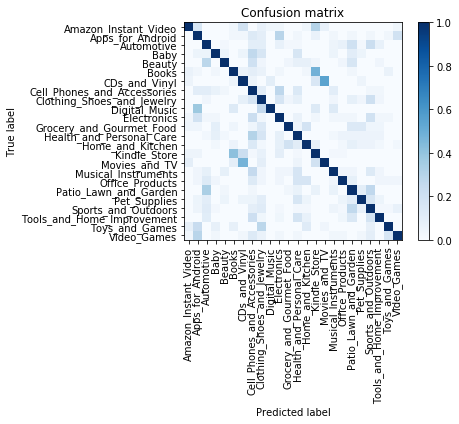

In [5]:
test_prd_bnb = clf_bnb.predict(test_X)
test_err_bnb = tester.error_ratio(test_Y, test_prd_bnb)
tester.disp_conf_matrix(test_Y, test_prd_bnb, classes)

### Logistic Regression

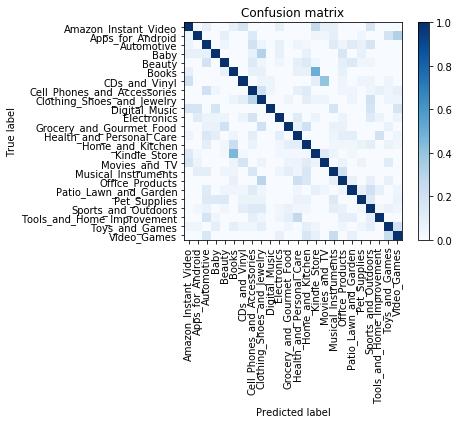

In [6]:
test_prd_lr = clf_lr.predict(test_X)
test_err_lr = tester.error_ratio(test_Y, test_prd_lr)
tester.disp_conf_matrix(test_Y, test_prd_lr, classes)

### Random Forests

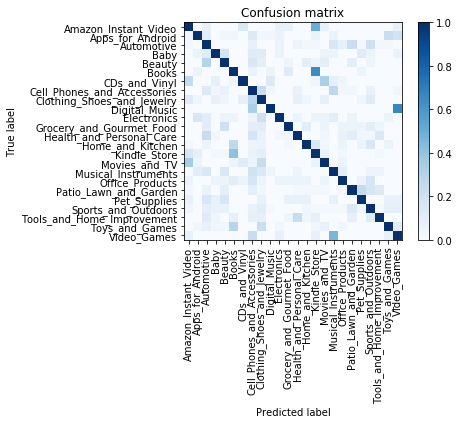

In [7]:
# test_prd_rf = clf_rf.predict(test_X)
# test_err_rf = tester.error_ratio(test_Y, test_prd_rf)
# tester.disp_conf_matrix(test_Y, test_prd_rf, classes)

### Gradient Boosting

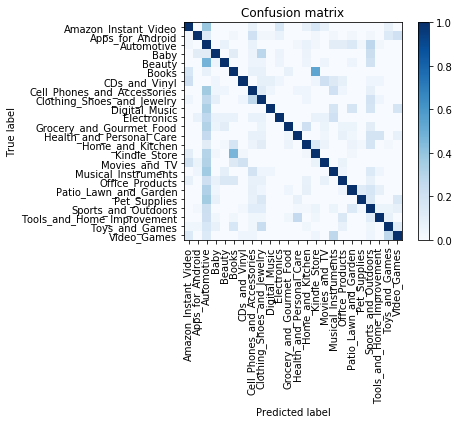

In [8]:
test_prd_gb = clf_gb.predict(test_X)
test_err_gb = tester.error_ratio(test_Y, test_prd_gb)
tester.disp_conf_matrix(test_Y, test_prd_gb, classes)

### Ensemble

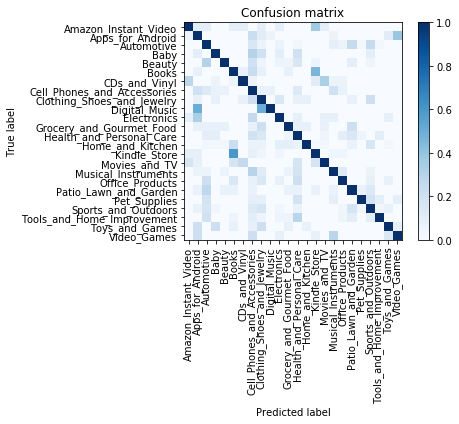

In [9]:
test_predictions = [
    test_prd_nb,
    test_prd_bnb,
    test_prd_lr,
#     test_prd_rf,
    test_prd_gb
]
test_prd_ensemble = tester.predict_ensemble(test_X, test_predictions)
test_err_ensemble = tester.error_ratio(test_Y, test_prd_ensemble)
tester.disp_conf_matrix(test_Y, test_prd_ensemble, classes)

## Results

In [10]:
print("Multinomial Naive Bayes Testing Error:", test_err_nb)
print("Bernoulli Naive Bayes Testing Error:  ", test_err_bnb)
print("Logistic Regression Testing Error:    ", test_err_lr)
# print("Random Forest Testing Error:          ", test_err_rf)
print("Gradient Boosting Testing Error:      ", test_err_gb)
print("Ensemble Testing Error:               ", test_err_ensemble)

Multinomial Naive Bayes Testing Error: 0.24665461121157323
Bernoulli Naive Bayes Testing Error:   0.23978300180831827
Logistic Regression Testing Error:     0.17902350813743217
Random Forest Testing Error:           0.20397830018083182
Gradient Boosting Testing Error:       0.19276672694394215
Ensemble Testing Error:                0.1468354430379747
